# **Helmet detection**

Safety is the most important aspect in construction and related hazardous workplaces. Personal protective equipment(PPE) serves as the first line of defense against accidents.

# Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your YOLOv4 system will be able to process detections over 100 times faster than CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
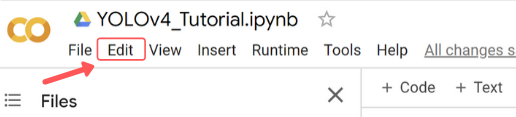
### ii) Click **Notebook Settings** within dropdown
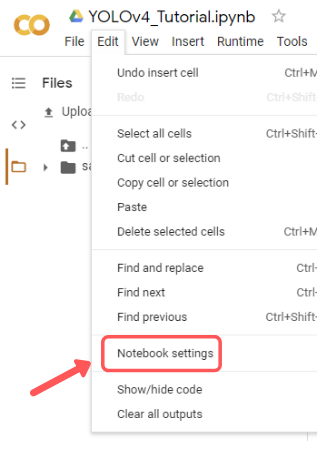
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
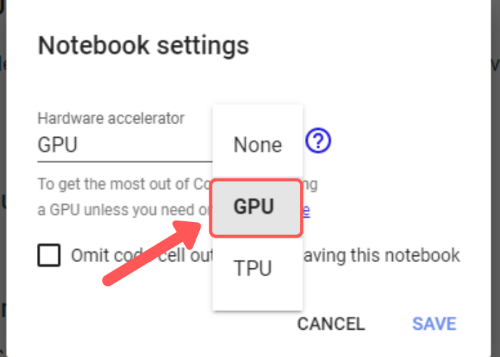

Your notebook should now have GPU enabled!

In [1]:
!apt-get update
# update the linux environment

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,004 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,269 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,081 kB]
Hit:13 https://ppa.launchpadcontent.ne

We use YOLO for helmet testing. First we downloaded the source code from Github.

YOLO - Neural Networks for Object Detection

In [2]:
!git clone https://github.com/AlexeyAB/darknet.git
# Clone a repository from GitHub to the local machine using Git.

Cloning into 'darknet'...
remote: Enumerating objects: 15825, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 15825 (delta 151), reused 222 (delta 140), pack-reused 15539
Receiving objects: 100% (15825/15825), 14.75 MiB | 17.94 MiB/s, done.
Resolving deltas: 100% (10581/10581), done.


In [3]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile # Enable OPENCV. OPENCV is used for developing real-time computer vision applications.
!sed -i 's/GPU=0/GPU=1/' Makefile # Enable GPU.Enable GPU acceleration.
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile # Enable CUDNN. CUDA Deep Neural Network. CuDNN provides efficient implementations of common operations used in deep learning.
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile # Enable CUDNN_HALF. CuDNN Half Precision. It enables the use of half-precision floating-point (FP16) data types for deep learning computations.
# Change the current working directory to the darknet directory in the file system.
# Configuring the runtime environment

/content/darknet


We enter the Darknet folder and use 'ls' to see the contents of the folder.

In [4]:
!ls
# List the files and directories in the current working directory.

3rdparty		data		       net_cam_v3.sh
build			docker-compose.yml     net_cam_v4.sh
build.ps1		Dockerfile.cpu	       package.xml
cfg			Dockerfile.gpu	       README.md
cmake			image_yolov3.sh        scripts
CMakeLists.txt		image_yolov4.sh        src
DarknetConfig.cmake.in	include		       vcpkg.json
darknet_images.py	json_mjpeg_streams.sh  vcpkg.json.opencv23
darknet.py		LICENSE		       video_yolov3.sh
darknet_video.py	Makefile	       video_yolov4.sh


Yolo,a real-time object detection algorithm system, is based on Darknet, an open source neural network framework written in C and CUDA, so we need to compile(make) the C environment in the environment before we start using it.

In [5]:
!/usr/local/cuda/bin/nvcc --version
# Check the CUDA version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [6]:
!make
# Build the darknet framework from the source code in the current working directory.
# Do not worry about any warnings when you run the '!make' cell!

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

In [7]:
!ls
# Check what has been changed after '!make'

3rdparty		data		       obj
backup			docker-compose.yml     package.xml
build			Dockerfile.cpu	       README.md
build.ps1		Dockerfile.gpu	       results
cfg			image_yolov3.sh        scripts
cmake			image_yolov4.sh        src
CMakeLists.txt		include		       vcpkg.json
darknet			json_mjpeg_streams.sh  vcpkg.json.opencv23
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh
darknet_video.py	net_cam_v4.sh


In [8]:
! ./darknet
# Run the darknet executable file in the current working directory.

usage: ./darknet <function>


Download the YOLO model.

In [9]:
!wget https://pjreddie.com/media/files/darknet19_448.conv.23
# Download a pre-trained convolutional neural network (CNN) model for use with the darknet object detection framework.

--2023-10-11 07:04:22--  https://pjreddie.com/media/files/darknet19_448.conv.23
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79327120 (76M) [application/octet-stream]
Saving to: ‘darknet19_448.conv.23’

darknet19_448.conv. 100%[===================>]  75.65M  21.4MB/s    in 4.4s    

2023-10-11 07:04:28 (17.0 MB/s) - ‘darknet19_448.conv.23’ saved [79327120/79327120]



In [10]:
!rm -rf /content/darknet/Safety_Detection
# Delete the directory named "Safety_Detection" and all its contents recursively from the path "/content/darknet".

In [11]:
!git clone https://github.com/mohanrajmit/Safety_Detection.git
# Download the helmet dataset from the Github repository.

Cloning into 'Safety_Detection'...
remote: Enumerating objects: 1387, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 1387 (delta 7), reused 7 (delta 7), pack-reused 1378
Receiving objects: 100% (1387/1387), 28.13 MiB | 15.70 MiB/s, done.
Resolving deltas: 100% (11/11), done.


Show image and lable.

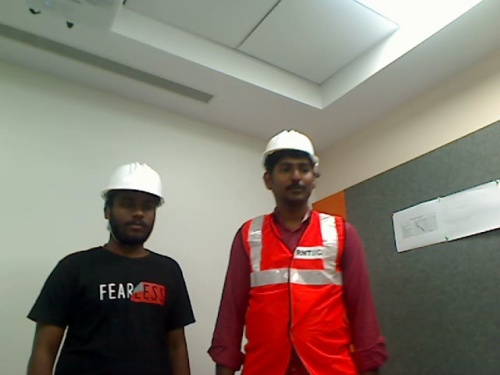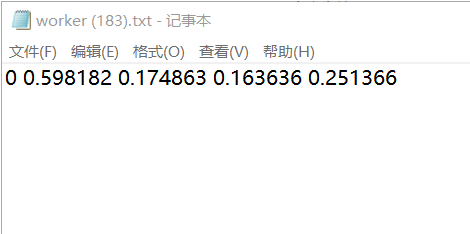

Here we introduce the YOLO data format.
Each row represents the category and position of an object, the first column represents the category of the object (in our data set, it represents the helmet), and the next four columns represent the location information of the object, which are respectively X, Y, W and H. The top left point is the source point (0,0), the bottom right point is (1,1) the distance between the center of the object and the far point is the coordinate (X,Y), and the detection width and height of the object are W,H. The left side of the graph (x,y,w,h) is (0.48,0.63,0.96,0.71).

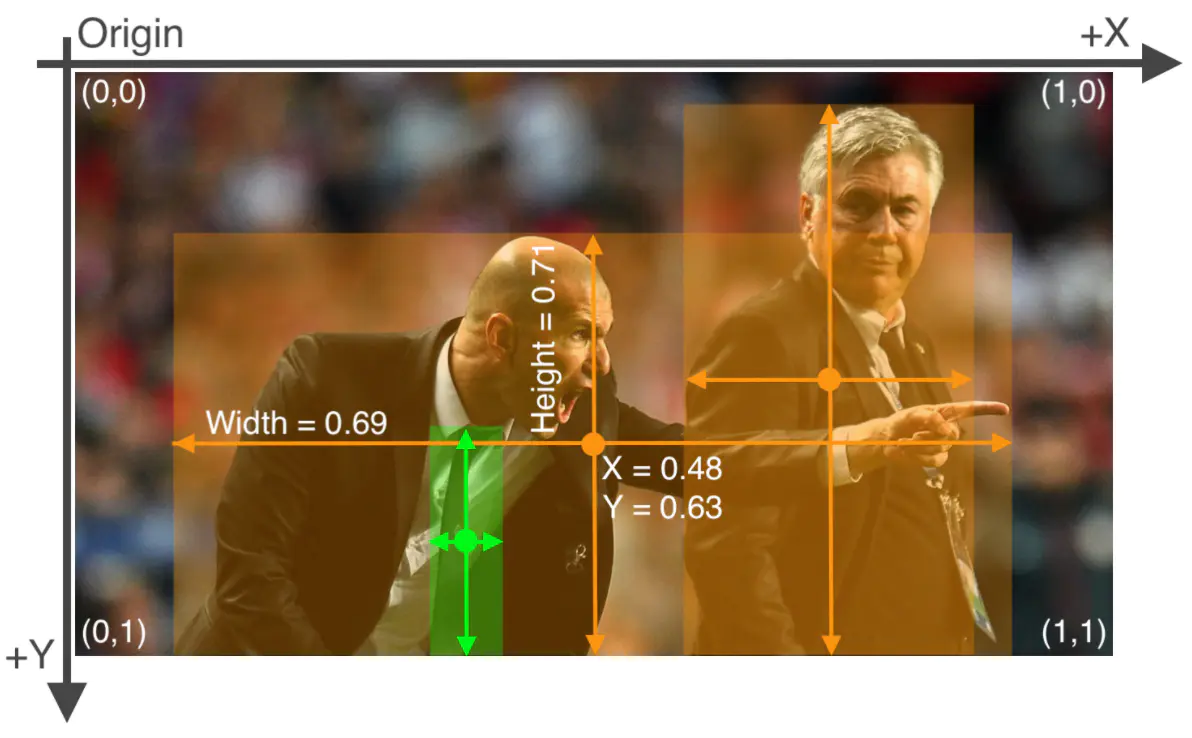

In [12]:
!mv /content/darknet/Safety_Detection/dataset /content/darknet
!mv /content/darknet/Safety_Detection/train.txt /content/darknet
# Move the directory named AAA to BBB.

With the training set and model in hand, we can begin formal training. Because the model is larger and the training time is longer.

In [ ]:
!./darknet detector train /content/darknet/Safety_Detection/obj.data cfg/yolo-voc.2.0.cfg darknet19_448.conv.23 -dont_show 0
# Train a YOLO (You Only Look Once) object detection model on the dataset provided in the "obj.data" file using the configuration file "yolo-voc.2.0.cfg" and the pre-trained weights "darknet19_448.conv.23".

串流輸出內容已截斷至最後 5000 行。
4218/45000: loss=0.0 hours left=21.9
 4218: 0.009678, 0.015644 avg loss, 0.001000 rate, 1.923566 seconds, 269952 images, 21.865797 hours left
Loaded: 0.000067 seconds
Region Avg IOU: 0.885278, Class: 0.999824, Obj: 0.881480, No Obj: 0.007023, Avg Recall: 1.000000,  count: 20
Region Avg IOU: 0.899172, Class: 0.999965, Obj: 0.901162, No Obj: 0.004684, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.913724, Class: 0.999985, Obj: 0.905333, No Obj: 0.003831, Avg Recall: 1.000000,  count: 10
Region Avg IOU: 0.887781, Class: 0.999951, Obj: 0.897170, No Obj: 0.004587, Avg Recall: 1.000000,  count: 11
Region Avg IOU: 0.899905, Class: 0.999862, Obj: 0.893471, No Obj: 0.007311, Avg Recall: 1.000000,  count: 18
Region Avg IOU: 0.856987, Class: 0.999844, Obj: 0.880684, No Obj: 0.005539, Avg Recall: 1.000000,  count: 15
Region Avg IOU: 0.748646, Class: 0.999987, Obj: 0.745667, No Obj: 0.004534, Avg Recall: 0.866667,  count: 15
Region Avg IOU: 0.927476, Class: 0.999979, Obj: 